In [1]:
# -------------------------2번문제------------------------------------------------------------------
# 2) 암 분류기
# - 구글 UCI EDU DATASET > Datasets > UCI Machine Learning Repository
# - 전체 569건의 데이터 중 다음의 기준으로 분류
# - train : 1번~400번까지
# - test : 401번~569번까지
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [44]:
allset = pd.read_csv("cancer/wdbc.data",  header = None) # 전체셋 생성
allset[1] = allset[1].replace({'M':'1',"B":'0'}).astype('int64')  # 전체셋 양성, 악성부분 변환
allset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [59]:
train=allset[:400]  # 테스트셋 생성
train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,903811,0,14.06,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.032510,...,14.92,25.34,96.42,684.5,0.10660,0.1231,0.0846,0.07911,0.2523,0.06609
396,90401601,0,13.51,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.053810,...,14.80,27.20,97.33,675.2,0.14280,0.2570,0.3438,0.14530,0.2666,0.07686
397,90401602,0,12.80,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.040830,...,13.74,21.06,90.72,591.0,0.09534,0.1812,0.1901,0.08296,0.1988,0.07053
398,904302,0,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,...,12.68,20.35,80.79,496.7,0.11200,0.1879,0.2079,0.05556,0.2590,0.09158


In [53]:
test=allset[400:].drop(columns=[1]) # 정답을 제거한 테스트셋 
test 

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
400,90439701,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,...,20.800,27.78,149.60,1304.0,0.18730,0.59170,0.90340,0.19640,0.3245,0.11980
401,904647,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,...,13.800,20.14,87.64,589.5,0.13740,0.15750,0.15140,0.06876,0.2460,0.07262
402,904689,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,...,14.130,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247
403,9047,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,13.860,23.02,89.69,580.9,0.11720,0.19580,0.18100,0.08388,0.3297,0.07834
404,904969,12.34,14.95,78.29,469.1,0.08682,0.04571,0.02109,0.02054,0.1571,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [56]:
answer = allset[400:][1] # 테스트셋 정답칸 지정 
answer

400    1
401    0
402    0
403    0
404    0
      ..
564    1
565    1
566    1
567    1
568    0
Name: 1, Length: 169, dtype: int64

In [57]:
trainLen = len(train) # 길이 확인
trainLen

400

<Axes: >

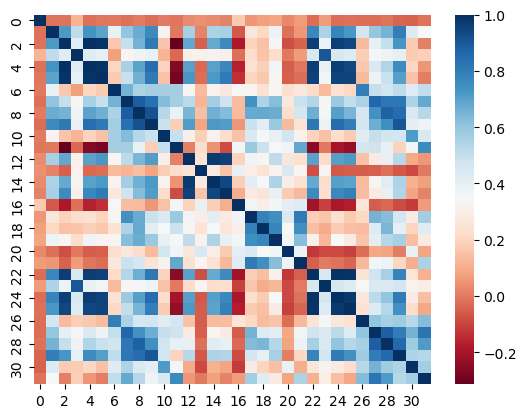

In [58]:
train_corr = train.corr()
sns.heatmap(train_corr,cmap="RdBu", annot=False)
# 1번 인덱스는 양성과 악성을 나눈다. 여기서 가장 연관성이 있는 인덱스를 찾는다면 11번, 13번, 16~18번,20번, 21번 제외하고 전부 영향이 컸다. 
# 즉 해당 요소를 제거하고 양성과 악성을 결정하는 요인을 확인한다. 

In [63]:
total = train.append(test) # 훈련셋, 테스트셋 결합
total

C:\Users\user\AppData\Local\Temp\ipykernel_3240\4000256373.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = train.append(test) # 훈련셋, 테스트셋 결합


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,NaN,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,NaN,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,NaN,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,NaN,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [64]:
total=total.drop(columns=[11,13,16,17,18,20,21]) # 상관분석상 수치가 적은 부분 드랍
total

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,NaN,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,NaN,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,NaN,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,NaN,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [66]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       400 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  12      569 non-null    float64
 12  14      569 non-null    float64
 13  15      569 non-null    float64
 14  19      569 non-null    float64
 15  22      569 non-null    float64
 16  23      569 non-null    float64
 17  24      569 non-null    float64
 18  25      569 non-null    float64
 19  26      569 non-null    float64
 20  27      569 non-null    float64
 21  28      569 non-null    float64
 22  29

In [65]:
train = total[:trainLen] # 훈련셋 설정
train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,903811,0.0,14.06,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.032510,...,14.92,25.34,96.42,684.5,0.10660,0.1231,0.0846,0.07911,0.2523,0.06609
396,90401601,0.0,13.51,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.053810,...,14.80,27.20,97.33,675.2,0.14280,0.2570,0.3438,0.14530,0.2666,0.07686
397,90401602,0.0,12.80,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.040830,...,13.74,21.06,90.72,591.0,0.09534,0.1812,0.1901,0.08296,0.1988,0.07053
398,904302,0.0,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,...,12.68,20.35,80.79,496.7,0.11200,0.1879,0.2079,0.05556,0.2590,0.09158


In [67]:
xtrain = train.drop(columns=[1])  # 훈련 데이터셋
xtrain

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,903811,14.06,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.032510,0.1641,...,14.92,25.34,96.42,684.5,0.10660,0.1231,0.0846,0.07911,0.2523,0.06609
396,90401601,13.51,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.053810,0.1806,...,14.80,27.20,97.33,675.2,0.14280,0.2570,0.3438,0.14530,0.2666,0.07686
397,90401602,12.80,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.040830,0.1574,...,13.74,21.06,90.72,591.0,0.09534,0.1812,0.1901,0.08296,0.1988,0.07053
398,904302,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,...,12.68,20.35,80.79,496.7,0.11200,0.1879,0.2079,0.05556,0.2590,0.09158


In [68]:
ytrain = train[1]
ytrain

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: 1, Length: 400, dtype: float64

In [72]:
xtest = total[trainLen:].drop(columns=[1])
xtest

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
400,90439701,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,...,20.800,27.78,149.60,1304.0,0.18730,0.59170,0.90340,0.19640,0.3245,0.11980
401,904647,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,...,13.800,20.14,87.64,589.5,0.13740,0.15750,0.15140,0.06876,0.2460,0.07262
402,904689,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,...,14.130,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247
403,9047,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,13.860,23.02,89.69,580.9,0.11720,0.19580,0.18100,0.08388,0.3297,0.07834
404,904969,12.34,14.95,78.29,469.1,0.08682,0.04571,0.02109,0.02054,0.1571,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [69]:
scaler = StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [70]:
xtrain = scaler.transform(xtrain)
xtrain

array([[-0.23842358,  1.02657917, -2.08243377, ...,  2.15688186,
         2.44600065,  1.81229287],
       [-0.23842162,  1.74850201, -0.28733171, ...,  0.98475209,
        -0.31937386,  0.23870437],
       [ 0.52285484,  1.50226476,  0.55799375, ...,  1.82620546,
         0.96993905,  0.16286878],
       ...,
       [ 0.57850315, -0.42566095, -0.36263369, ..., -0.53635939,
        -1.45779384, -0.73504567],
       [-0.23785804, -0.91253915, -1.00148598, ..., -0.94084749,
        -0.55841218,  0.3735232 ],
       [-0.23785754, -0.70547601, -0.41121561, ..., -0.97037217,
        -0.27604817, -0.17259838]])

In [73]:
xtest = scaler.transform(xtest)
xtest

array([[ 0.57885068,  1.00419397,  0.50212454, ...,  1.13828043,
         0.42015092,  1.85969011],
       [-0.23785489, -0.66910005, -1.95369167, ..., -0.74598461,
        -0.75263081, -0.62497874],
       [-0.23785451, -0.38089055, -0.16101871, ..., -0.78554768,
         0.36337932, -0.63287828],
       ...,
       [-0.23765142,  0.63763625,  2.21706642, ...,  0.33225668,
        -1.11417627, -0.33111583],
       [-0.2376488 ,  1.75689646,  2.52070344, ...,  2.15097693,
         1.67809006,  2.08087725],
       [-0.24526071, -1.83592882,  1.35716638, ..., -1.76104309,
        -0.13860114, -0.74241858]])

In [74]:
clf = KNeighborsClassifier()

In [75]:
params ={'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25,27,29]} 

In [76]:
gs=GridSearchCV(clf, param_grid=params , cv= 5, scoring='roc_auc')

In [77]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29]},
             scoring='roc_auc')

In [78]:
print(gs.best_score_)
print(gs.best_estimator_)

0.9910794056753136
KNeighborsClassifier(n_neighbors=15)


In [79]:
pred = gs.predict(xtest)
pred

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.])

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(answer,pred)

0.9763313609467456